In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px

from scipy.stats import chi2_contingency

In [2]:
# Load datasets
tree_census_path = "../data/clean/tree_data/2015.csv"
zip_path = "../data/clean/geo_data/zip_data.geojson"
nta_path = "../data/clean/geo_data/nta_data.geojson"
borough_path = "../data/clean/geo_data/borough_data.geojson"

df = pd.read_csv(tree_census_path)
gdfz = gpd.read_file(zip_path)
gdfn = gpd.read_file(nta_path)
gdfb = gpd.read_file(borough_path)

In [3]:
list(df.columns)

['tree_id',
 'tree_diameter',
 'tree_condition',
 'species_common_name',
 'stewardship_level',
 'guards_impact',
 'borough',
 'nta_code',
 'nta_name',
 'latitude',
 'longitude',
 'sidewalk_damage',
 'ground_level_conflict',
 'tree_level_conflict',
 'geometry',
 'zip_code',
 'pop_est']

In [4]:
list(gdfz.columns)

['zip_code',
 'area_zip_m2',
 'area_zip_km2',
 'area_zip_hectares',
 'zip_centroid',
 'zip_centroid_lat',
 'zip_centroid_lon',
 'nta_name',
 'nta_code',
 'borough',
 'geometry']

In [5]:
list(gdfn.columns)

['nta_name',
 'nta_code',
 'borough',
 'area_nta_m2',
 'area_nta_km2',
 'area_nta_hectares',
 'nta_centroid_lat',
 'nta_centroid_lon',
 'geometry']

In [13]:
list(gdfb.columns)

['boro_code',
 'borough',
 'area_borough_m2',
 'area_borough_km2',
 'area_borough_hectares',
 'geometry']

In [6]:
# Change the zip code data type to string since it is a category
df["zip_code"] = df["zip_code"].astype("str")

In [7]:
def chi2_test(target, features):

    result_list = []

    for col in features.columns:
    
        # Calculate correlations between categorical columns
        confusion_matrix = pd.crosstab(target, features[col])
        #print(confusion_matrix)
        
        # Chi-square test of independence
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        #print(chi2)
        
        # Use scientific notation for p-value if it's very small
        p_formatted = np.format_float_scientific(p, precision=2)
        
        # Calculate Cramer's V
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        cramers_v = np.sqrt(phi2 / min(k-1, r-1))
        
        # Interpretation of Cramér's V
        if cramers_v < 0.1:
            interpretation = "Very weak association"
        elif cramers_v < 0.2:
            interpretation = "Weak association"
        elif cramers_v < 0.4:
            interpretation = "Moderate association"
        elif cramers_v < 0.6:
            interpretation = "Relatively strong association"
        elif cramers_v < 0.8:
            interpretation = "Strong association"
        else:
            interpretation = "Very strong association"
        
        result_list.append({
            "column": col,
            "chi2_statistic": chi2,
            "p_value": p_formatted,
            "cramers_v": cramers_v,
            "interpretation": interpretation
        })

    df = pd.DataFrame(result_list)

    return df

In [8]:
target_cols = df[["tree_condition", "stewardship_level", "guards_impact"]]
cat_cols = df.select_dtypes("object")

In [9]:
for col in target_cols:
    print("Crosstab results for:", col, "\n")
    display(chi2_test(df[col], cat_cols))
    print("\n****************************************\n")

Crosstab results for: tree_condition 



column  chi2_statistic   p_value  cramers_v  \
0          tree_condition    2.051364e+06    0.e+00   1.000000   
1     species_common_name    7.014317e+05    0.e+00   0.584751   
2       stewardship_level    6.838741e+05    0.e+00   0.577387   
3           guards_impact    6.843911e+05    0.e+00   0.577605   
4                 borough    1.866809e+03    0.e+00   0.030167   
5                nta_code    1.903352e+04    0.e+00   0.096325   
6                nta_name    1.903352e+04    0.e+00   0.096325   
7         sidewalk_damage    6.840692e+05    0.e+00   0.707252   
8   ground_level_conflict    1.188407e+04    0.e+00   0.131832   
9     tree_level_conflict    1.637578e+04    0.e+00   0.154753   
10               geometry    2.050351e+06  4.41e-01   0.999753   
11               zip_code    1.727428e+04    0.e+00   0.091765   

                   interpretation  
0         Very strong association  
1   Relatively strong association  
2   Relatively strong association  
3   Relatively strong association  
4           Very weak association  
5           Very weak association  
6           Very weak association  
7              Strong association  
8                Weak association  
9                Weak association  
10        Very strong association  
11          Very weak association


****************************************

Crosstab results for: stewardship_level 



column  chi2_statistic   p_value  cramers_v  \
0          tree_condition    6.838741e+05    0.e+00   0.577387   
1     species_common_name    7.091008e+05    0.e+00   0.509171   
2       stewardship_level    2.735152e+06    0.e+00   1.000000   
3           guards_impact    8.997530e+05    0.e+00   0.573550   
4                 borough    4.618265e+04    0.e+00   0.129942   
5                nta_code    1.059916e+05    0.e+00   0.196854   
6                nta_name    1.059916e+05    0.e+00   0.196854   
7         sidewalk_damage    6.860147e+05    0.e+00   0.708257   
8   ground_level_conflict    1.591547e+04    0.e+00   0.152563   
9     tree_level_conflict    6.936608e+03    0.e+00   0.100719   
10               geometry    2.734583e+06  3.07e-01   0.999896   
11               zip_code    1.030826e+05    0.e+00   0.194134   

                   interpretation  
0   Relatively strong association  
1   Relatively strong association  
2         Very strong association  
3   Relatively strong association  
4                Weak association  
5                Weak association  
6                Weak association  
7              Strong association  
8                Weak association  
9                Weak association  
10        Very strong association  
11               Weak association


****************************************

Crosstab results for: guards_impact 



column  chi2_statistic   p_value  cramers_v  \
0          tree_condition    6.843911e+05    0.e+00   0.577605   
1     species_common_name    7.009704e+05    0.e+00   0.506243   
2       stewardship_level    8.997530e+05    0.e+00   0.573550   
3           guards_impact    2.735152e+06    0.e+00   1.000000   
4                 borough    8.406843e+04    0.e+00   0.175318   
5                nta_code    1.466474e+05    0.e+00   0.231551   
6                nta_name    1.466474e+05    0.e+00   0.231551   
7         sidewalk_damage    6.853865e+05    0.e+00   0.707933   
8   ground_level_conflict    1.744948e+04    0.e+00   0.159746   
9     tree_level_conflict    8.625494e+03    0.e+00   0.112313   
10               geometry    2.734509e+06  3.18e-01   0.999882   
11               zip_code    1.472286e+05    0.e+00   0.232009   

                   interpretation  
0   Relatively strong association  
1   Relatively strong association  
2   Relatively strong association  
3         Very strong association  
4                Weak association  
5            Moderate association  
6            Moderate association  
7              Strong association  
8                Weak association  
9                Weak association  
10        Very strong association  
11           Moderate association


****************************************



#### Tree Density

### Tree density by borough

<Axes: >

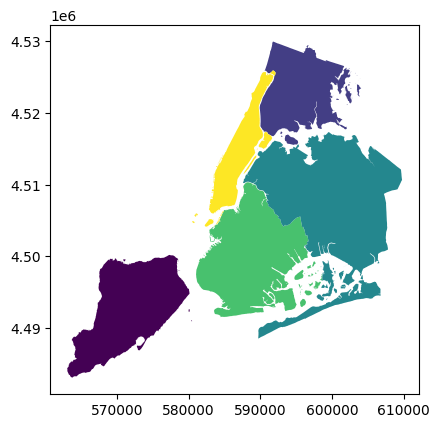

In [10]:
tree_density_borough = df.groupby(by="borough").size().reset_index(name="count")
tree_density_borough = tree_density_borough.merge(gdfb, on="borough")
tree_density_borough["count_per_hectare"] = tree_density_borough["count"] / tree_density_borough["area_borough_hectares"]
td = gpd.GeoDataFrame(tree_density_borough)
td.plot(column="count_per_hectare")

### Tree density by zip_code

<Axes: >

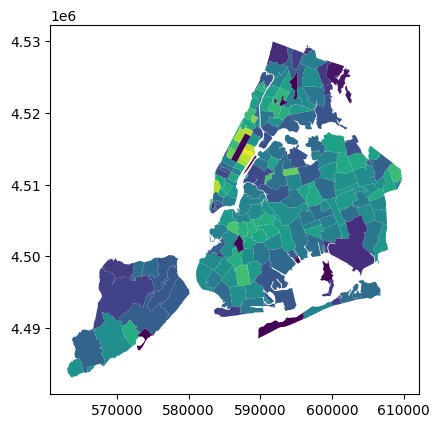

In [11]:
tree_density_zip = df.groupby(by="zip_code").size().reset_index(name="count")
tree_density_zip = tree_density_zip.merge(gdfz, on="zip_code", how="right")[["zip_code", "count", "area_zip_hectares", "nta_name", "borough", "geometry"]].fillna(0)
tree_density_zip["count_per_hectare"] = tree_density_zip["count"] / tree_density_zip["area_zip_hectares"]
tdz = gpd.GeoDataFrame(tree_density_zip)
tdz.plot(column="count_per_hectare")

### Tree density by nta_code

<Axes: >

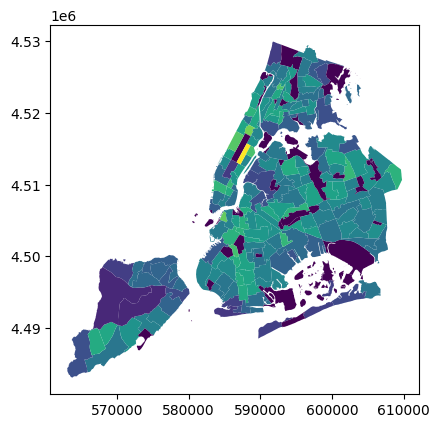

In [12]:
tree_density_nta = df.groupby(by="nta_code").size().reset_index(name="count")
tree_density_nta = tree_density_nta.merge(gdfn, on="nta_code", how="right")[["nta_code", "count", "area_nta_hectares", "nta_name", "borough", "geometry"]]
tree_density_nta["count"] = tree_density_nta["count"].fillna(0)
tree_density_nta["count_per_hectare"] = tree_density_nta["count"] / tree_density_nta["area_nta_hectares"]
tdn = gpd.GeoDataFrame(tree_density_nta)
tdn.plot(column="count_per_hectare")

In [13]:
gdf = tdn.to_crs(epsg=4326)
gdf

nta_code    count  area_nta_km2  \
0       qn98      0.0     21.190789   
1       bx31   3843.0      2.941985   
2       si01  12969.0     13.107750   
3       si48   6999.0      4.680438   
4       qn70   4393.0      3.652637   
..       ...      ...           ...   
191     bk40   2290.0      1.303719   
192     qn53   4260.0      3.438639   
193     bx62   4083.0      3.689788   
194     qn63   2739.0      2.622429   
195     mn32   2269.0      1.267209   

                                       nta_name        borough  \
0                                       airport         queens   
1                       allerton-pelham gardens          bronx   
2    annadale-huguenot-prince's bay-eltingville  staten island   
3                                 arden heights  staten island   
4                                       astoria         queens   
..                                          ...            ...   
191                             windsor terrace       brooklyn   
192                                   woodhaven         queens   
193                          woodlawn-wakefield          bronx   
194                                    woodside         queens   
195                                   yorkville      manhattan   

                                              geometry  count_per_km2  
0    MULTIPOLYGON (((-73.74706 40.63716, -73.74703 ...       0.000000  
1    POLYGON ((-73.84834 40.8587, -73.84931 40.8587...    1306.260937  
2    POLYGON ((-74.17779 40.51936, -74.17827 40.519...     989.414681  
3    POLYGON ((-74.18285 40.54515, -74.1839 40.5439...    1495.373023  
4    POLYGON ((-73.92563 40.75214, -73.92416 40.753...    1202.692652  
..                                                 ...            ...  
191  POLYGON ((-73.97685 40.64544, -73.97777 40.645...    1756.513770  
192  POLYGON ((-73.8593 40.68049, -73.85966 40.6803...    1238.862071  
193  POLYGON ((-73.86071 40.89537, -73.86136 40.894...    1106.567599  
194  POLYGON ((-73.89897 40.74075, -73.89909 40.740...    1044.451359  
195  MULTIPOLYGON (((-73.94488 40.77257, -73.94562 ...    1790.549540  

[196 rows x 7 columns]

### Tree Species Data

In [14]:
species_path = "../data/raw/tree_data/new_york_tree_species.csv"
species = pd.read_csv(species_path)
species.head()

species_scientific_name species_common_name       form growth_rate  \
0                 Ginkgo biloba              Ginkgo    Upright        Slow   
1     Quercus spp. 'Fastigiata'      Fastigiata Oak    Upright        Slow   
2       Liquidambar styraciflua            Sweetgum  Pyramidal      Medium   
3  Metasequoia glyptostroboides        Dawn Redwood  Pyramidal      Medium   
4            Taxodium distichum         Baldcypress  Pyramidal      Medium   

     fall_color                           environmental_tolerances  \
0        Yellow  Salt Drought High Wind Pollution and High pH T...   
1        Maroon                                               none   
2        Yellow                                  Wet Site Tolerant   
3  Orange/Brown                  Wet Site Drought High pH Tolerant   
4  Orange/Brown               Wet Site Salt and High Wind Tolerant   

                location_tolerances  \
0  Median Tree Narrow Growing Space   
1  Median Tree Narrow Growing Space   
2                              none   
3  Median Tree Narrow Growing Space   
4  Median Tree Narrow Growing Space   

                           notes_suggested_cultivars  \
0               'Autumn Gold' or 'Presedential Gold'   
1                      Similar tree is Quercus robur   
2  Plant Spring Only lawn pits only look for 'Rot...   
3                      Can Grow 2 to 3 Feet per Year   
4                                Ideal For Wet Soils   

                       tree_size comments  
0  Large (Mature Height > 50 ft)      NaN  
1  Large (Mature Height > 50 ft)      NaN  
2  Large (Mature Height > 50 ft)      NaN  
3  Large (Mature Height > 50 ft)      NaN  
4  Large (Mature Height > 50 ft)      NaN

In [15]:
species.environmental_tolerances.value_counts()

environmental_tolerances
none                                                              9
Salt and High pH Tolerant                                         5
Salt Drought Pollution and High pH Tolerant                       4
Salt and Drought Tolerant                                         3
Wet Site and Shade Tolerant                                       3
Salt Tolerant                                                     3
Drought High Wind and Pollution Tolerant                          2
Shade and High pH Tolerant                                        2
Drought and Pollution Tolerant                                    2
High pH Tolerant                                                  2
Drought and High pH Tolerant                                      2
Wet Site Salt Drought High Wind Pollution and High pH Tolerant    2
Pollution Tolerant                                                2
Wet Site Tolerant                                                 2
Salt Shade and High pH 

### Tree Density with HDBSCAN
In the app:
- Show me all the clusters where the average distance between points is 'x' and the minimum number of trees in the cluster is 'y'

In [86]:
# Create a subset of the data for training purposes
df_man = df.loc[(df.borough == "manhattan") & (df.species_common_name == "london planetree")].copy()

gs = gpd.GeoSeries.from_wkt(df_man['geometry'])
training_data = gpd.GeoDataFrame(df_man, geometry=gs, crs="EPSG:32618")

#training_data.crs

#training_data = gpd.GeoDataFrame(training_data)
#training_data.set_geometry("geometry", drop=None, inplace=False, crs=None)
#print(training_data.active_geometry_name)
#type(training_data)

In [58]:
from sklearn.cluster import HDBSCAN

In [87]:
X = training_data[["latitude", "longitude"]].copy()
hdb = HDBSCAN(min_cluster_size=50, min_samples=5)
labels = hdb.fit_predict(X)
training_data["cluster"] = labels
training_data.cluster.nunique()

25

In [91]:
from shapely.geometry import MultiPoint
from shapely.ops import unary_union

# Group the data by cluster label (excluding noise, i.e., clusters labeled as -1)
cluster_groups = training_data[training_data['cluster'] != -1].groupby('cluster')

# Create an empty list to store the cluster polygons
polygons = []

for cluster_id, group in cluster_groups:

    # Count the number of tree in the group
    num_trees = len(group)
    
    # Extract the points in the cluster as a Shapely MultiPoint object
    points = MultiPoint(list(group["geometry"]))
    
    # Create a convex hull for the cluster
    # You can replace this with a concave hull for tighter boundaries if desired
    polygon = points.convex_hull
    
    # Store the polygon along with the cluster id
    polygons.append({'cluster': cluster_id, 'geometry': polygon, 'num_trees': num_trees})

# Convert the polygons into a new GeoDataFrame for visualization
polygon_gdf = gpd.GeoDataFrame(polygons)
#polygon_gdf.set_crs(epsg=32618, inplace=True)

# Calculate the area of each polygon in km2
polygon_gdf["area_km2"] = polygon_gdf.geometry.area / 1000000
polygon_gdf["hectares"] = polygon_gdf.geometry.area / 10000

# Create a columns showing the number of trees per hectare
polygon_gdf["trees_per_hectare"] = polygon_gdf["num_trees"] / polygon_gdf["hectares"]

polygon_gdf

cluster                                           geometry  num_trees  \
0         0  POLYGON ((585710.053 4507137.224, 585667.658 4...        141   
1         1  POLYGON ((586369.089 4509973.053, 586282.421 4...         66   
2         2  POLYGON ((587164.835 4517435.367, 587119.945 4...         86   
3         3  POLYGON ((583953.64 4508128.024, 583785.45 450...        288   
4         4  POLYGON ((584257.994 4510231.742, 583903.165 4...        100   
5         5  POLYGON ((586283.077 4508425.731, 586269.347 4...        268   
6         6  POLYGON ((589879.045 4521977.185, 589826.464 4...         61   
7         7  POLYGON ((585131.396 4507182.79, 585120.772 45...        196   
8         8  POLYGON ((584802.448 4506981.853, 584777.428 4...         70   
9         9  POLYGON ((589216.01 4520331.867, 588759.937 45...        127   
10       10  POLYGON ((588013.543 4519188.27, 588068.692 45...        121   
11       11  POLYGON ((587752.078 4514468.67, 587677.606 45...         56   
12       12  POLYGON ((589897.645 4516272.967, 589291.659 4...         68   
13       13  POLYGON ((587602.465 4513596.009, 587543.738 4...        180   
14       14  POLYGON ((587396.049 4512637.401, 587093.437 4...        126   
15       15  POLYGON ((586374.621 4514545.611, 586274.322 4...        287   
16       16  POLYGON ((586198.805 4514172.075, 586058.553 4...         50   
17       17  POLYGON ((588574.405 4518651.484, 588290.805 4...         61   
18       18  POLYGON ((588714.534 4518104.775, 588706.266 4...        141   
19       19  POLYGON ((588262.142 4515066.535, 588077.733 4...         61   
20       20  POLYGON ((588743.434 4515590.996, 588446.904 4...        146   
21       21  POLYGON ((589702.4 4517417.531, 589189.335 451...        115   
22       22  POLYGON ((588518.858 4516898.974, 588462.684 4...        140   
23       23  POLYGON ((588189.678 4516992.514, 588163.16 45...         65   

    area_km2    hectares  trees_per_hectare  
0   0.688636   68.863609           2.047526  
1   0.442645   44.264477           1.491038  
2   0.187583   18.758302           4.584637  
3   2.085802  208.580209           1.380764  
4   0.607606   60.760595           1.645804  
5   1.704609  170.460878           1.572208  
6   0.287081   28.708073           2.124838  
7   0.424997   42.499657           4.611802  
8   0.061900    6.189982          11.308595  
9   1.036945  103.694512           1.224751  
10  0.491503   49.150294           2.461837  
11  0.064211    6.421113           8.721229  
12  0.514844   51.484440           1.320787  
13  1.074251  107.425089           1.675586  
14  0.712159   71.215946           1.769267  
15  1.142727  114.272661           2.511537  
16  0.089219    8.921887           5.604195  
17  0.315993   31.599258           1.930425  
18  0.505050   50.505015           2.791802  
19  0.168641   16.864113           3.617148  
20  0.469106   46.910625           3.112301  
21  0.504368   50.436750           2.280083  
22  0.310981   31.098064           4.501888  
23  0.118093   11.809314           5.504130

<Axes: >

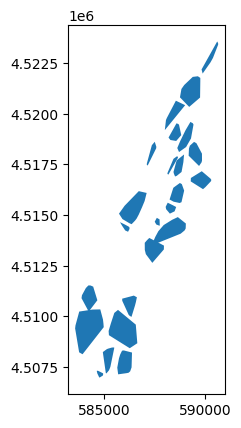

In [85]:
polygon_gdf.plot()